In [2]:
import gcsfs
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
fs = gcsfs.GCSFileSystem()
fs.ls('leap-persistent/yiqioyang/')

['leap-persistent/yiqioyang/cam6_PD_monthly_lwsw.zarr',
 'leap-persistent/yiqioyang/cam6_PD_monthly_prec.zarr',
 'leap-persistent/yiqioyang/gisse3ensemble_radiation_tcc_tlwp.zarr',
 'leap-persistent/yiqioyang/selected_cam6_fields.1yearave.nc',
 'leap-persistent/yiqioyang/selected_cam6_fields.1yearave.zarr',
 'leap-persistent/yiqioyang/selected_cam6_fields.2yearave.zarr',
 'leap-persistent/yiqioyang/selected_cam6_fields.3yearave.zarr',
 'leap-persistent/yiqioyang/testing',
 'leap-persistent/yiqioyang/tparams_gcmglobalaverages.CAM6tuningexp.v1.obsbias_used.1yearave.nc.zarr',
 'leap-persistent/yiqioyang/tparams_gcmglobalaverages.CAM6tuningexp.v1.obsbias_used.2yearave.nc.zarr',
 'leap-persistent/yiqioyang/tparams_gcmglobalaverages.CAM6tuningexp.v1.obsbias_used.3yearave.nc.zarr']

In [4]:
mapper = fs.get_mapper('gs://leap-persistent/yiqioyang/cam6_PD_monthly_lwsw.zarr')

In [5]:
lwsw_xr = xr.open_dataset(mapper, engine='zarr')

In [8]:
lwsw_xr['SWCF']

<xarray.DataArray 'SWCF' (ensemble: 262, time: 36, lat: 192, lon: 288)> Size: 2GB
[521551872 values with dtype=float32]
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Attributes:
    Sampling_Sequence:  rad_lwsw
    cell_methods:       time: mean
    long_name:          Shortwave cloud forcing
    units:              W/m2

In [4]:
mapper = fs.get_mapper("gs://leap-persistent/yiqioyang/cam6_PD_monthly_prec.zarr")
ds_xr = xr.open_dataset(mapper, engine = 'zarr')

In [3]:
fs.ls('leap-persistent/kylemcevoy/')

['leap-persistent/kylemcevoy/cesm2_le50_prec_quantile090.nc',
 'leap-persistent/kylemcevoy/cesm2_le50_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_le_prec_quantile095.nc',
 'leap-persistent/kylemcevoy/cesm2_ppe_param_set.zarr']

In [33]:
param_mapper = fs.get_mapper('gs://leap-scratch/kylemcevoy/param_set.zarr')
param_xr = xr.open_dataset(param_mapper, engine = 'zarr')

In [5]:
ds_xr_precc = ds_xr['PRECC']

In [6]:
ds_xr_precc.sel(lat = -90, ensemble = 0).max('time')

<xarray.DataArray 'PRECC' (lon: 288)> Size: 1kB
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)
Coordinates:
    ensemble  int64 8B 0
    lat       float64 8B -90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8

In [7]:
ds_precc_max = ds_xr_precc.max('time')

In [8]:
ds_precc_bool = xr.zeros_like(ds_precc_max, dtype = 'bool')

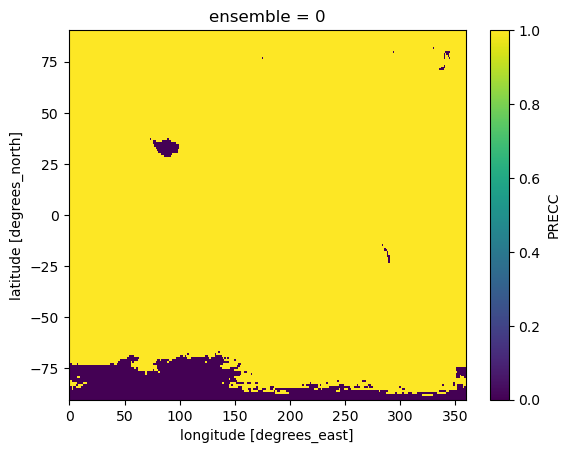

In [9]:
ds_precc_bool.where(ds_precc_max == 0, True, False).sel(ensemble = 0).plot()

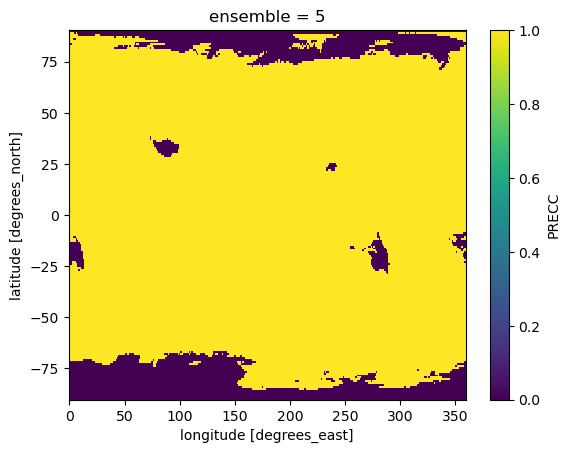

In [10]:
ds_precc_bool.where(ds_precc_max == 0, True, False).sel(ensemble = 5).plot()

In [11]:
ds_precc_max.sel()

<xarray.DataArray 'PRECC' (ensemble: 262, lat: 192, lon: 288)> Size: 58MB
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [1.28007632e-10, 1.37791098e-10, 1.44803308e-10, ...,
         9.67700295e-11, 9.93638435e-11, 1.14967043e-10],
        [1.24584218e-10, 1.18269630e-10, 1.13147811e-10, ...,
         1.41328824e-10, 1.36747821e-10, 1.31327019e-10],
        [5.47897179e-11, 5.47896693e-11, 5.47892356e-11, ...,
         5.47897942e-11, 5.47897804e-11, 5.47897595e-11]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [2.26403653e-11, 3.11069365e-11, 3.25599617e-11, ...,
         1.77742630e-11, 2.12351699e-11, 1.85171167e-11],
        [2.44944117e-11, 1.59900131e-11, 1.89636327e-11, ...,
         2.51681263e-11, 4.16124704e-11, 3.61160338e-11],
        [7.09494139e-12, 7.09494139e-12, 7.09494139e-12, ...,
         7.09494139e-12, 7.09494139e-12, 7.09494139e-12]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [4.42934968e-12, 2.49473857e-12, 1.53969079e-12, ...,
         4.39184149e-12, 3.88752919e-12, 5.84865359e-12],
        [2.25482081e-11, 2.21179550e-11, 1.93011388e-11, ...,
         2.47182396e-11, 2.58635890e-11, 2.42368764e-11],
        [2.40286870e-12, 2.40286328e-12, 2.40285894e-12, ...,
         2.40288171e-12, 2.40287781e-12, 2.40287369e-12]]], dtype=float32)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8

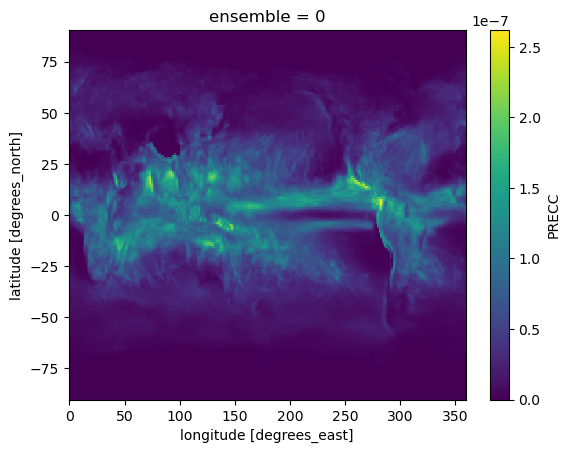

In [12]:
ds_xr_precc.max('time').sel(ensemble = 0).plot()

In [13]:
ds_xr.isel(time = 6, ensemble = 0).plot();

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [11]:
tmp_lat = ds_xr.lat[100].values
tmp_lon = ds_xr.lon[100].values

In [15]:
ds_indx = ds_xr.isel(lat = 100, lon = 100)

In [16]:
ds_indx

<xarray.Dataset> Size: 153kB
Dimensions:   (ensemble: 262, time: 36)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
    lat       float64 8B 4.241
    lon       float64 8B 125.0
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Data variables:
    PRECC     (ensemble, time) float32 38kB 4.953e-08 4.888e-08 ... 3.932e-08
    PRECL     (ensemble, time) float32 38kB ...
    PRECSC    (ensemble, time) float32 38kB ...
    PRECSL    (ensemble, time) float32 38kB ...
Attributes:
    cell_methods:  time: mean
    long_name:     Convective precipitation rate (liq + ice)
    units:         m/s

In [17]:
9432 / 262

36.0

In [18]:
ds_indx.time

<xarray.DataArray 'time' (time: 36)> Size: 288B
array([cftime.DatetimeNoLeap(1, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 5, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 7, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 12, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 5, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 7, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2, 12, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 4, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 5, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 6, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 7, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 8, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 9, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(3, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    lat      float64 8B 4.241
    lon      float64 8B 125.0
  * time     (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Attributes:
    bounds:     time_bnds
    long_name:  time

In [17]:
ds_indx.isel(ensemble = 0).plot();

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [18]:
ds_indx_ens0 = ds_indx.isel(ensemble = 0)

In [22]:
ds_xr_precc = ds_xr['PRECC']

In [23]:
xr.corr(ds_indx_ens0, ds_indx, 'time').plot()

TypeError: Only xr.DataArray is supported.Given [<class 'xarray.core.dataset.Dataset'>, <class 'xarray.core.dataset.Dataset'>].

In [25]:
xr.corr(ds_xr_precc.isel(lat = 100, lon = 100), ds_xr_precc.isel(lat = 99, lon = 99), 'time')

<xarray.DataArray 'PRECC' (ensemble: 262)> Size: 1kB
array([0.876408  , 0.9444797 , 0.72758156, 0.89811444, 0.9092645 ,
       0.96497923, 0.8985216 , 0.80401933, 0.82394284, 0.93966365,
       0.9200117 , 0.96106887, 0.975536  , 0.9061704 , 0.78333926,
       0.87745327, 0.96003014, 0.9546754 , 0.90475535, 0.92043686,
       0.9067421 , 0.95898604, 0.8647558 , 0.97239065, 0.9181765 ,
       0.97414696, 0.7960003 , 0.9436455 , 0.89977956, 0.9728477 ,
       0.91944027, 0.9519278 , 0.97664183, 0.6268154 , 0.87575954,
       0.89878684, 0.92858964, 0.94684863, 0.9216288 , 0.9845688 ,
       0.90407497, 0.9383473 , 0.935958  , 0.9105882 , 0.92346835,
       0.7362771 , 0.9311319 , 0.9772661 , 0.90779144, 0.9555288 ,
       0.9582038 , 0.8596946 , 0.95248395, 0.88409895, 0.9330947 ,
       0.93741596, 0.8361293 , 0.8422685 , 0.8860384 , 0.9326328 ,
       0.93477356, 0.8910072 , 0.9570931 , 0.90837526, 0.928434  ,
       0.92779326, 0.9694567 , 0.83272046, 0.93885165, 0.94411993,
       0.9525846 , 0.9395371 , 0.9659285 , 0.92146057, 0.9087007 ,
       0.9431959 , 0.95218074, 0.97023416, 0.9703916 , 0.36694193,
       0.9763099 , 0.93314224, 0.96165866, 0.97093046, 0.94909376,
       0.82972205, 0.9677204 , 0.9360723 , 0.8701957 , 0.9346671 ,
       0.9592613 , 0.95853573, 0.96306324, 0.9513851 , 0.9411265 ,
       0.95909035, 0.97324073, 0.9676024 , 0.9513814 , 0.88090146,
...
       0.748608  , 0.9645989 , 0.951744  , 0.74123144, 0.92333263,
       0.6779131 , 0.94347394, 0.8643878 , 0.92735106, 0.8716365 ,
       0.9723329 , 0.929084  , 0.9502224 , 0.8053909 , 0.9675043 ,
       0.90407664, 0.93964726, 0.89568347, 0.934159  , 0.8581835 ,
       0.9291967 , 0.928174  , 0.7659007 , 0.90664834, 0.82777506,
       0.9236299 , 0.9485138 , 0.9551001 , 0.9518383 , 0.94506663,
       0.8332296 , 0.9244344 , 0.93557185, 0.94086015, 0.9306019 ,
       0.90950906, 0.94786584, 0.88237286, 0.86269814, 0.89755434,
       0.9004995 , 0.9582628 , 0.8909634 , 0.9638418 , 0.95838386,
       0.95090973, 0.9031471 , 0.9566231 , 0.89138985, 0.9568583 ,
       0.9408309 , 0.95847183, 0.7653964 , 0.92160463, 0.96434397,
       0.9147828 , 0.96321636, 0.94420123, 0.70912945, 0.8737738 ,
       0.960567  , 0.97155714, 0.9015447 , 0.8519803 , 0.91754687,
       0.82014173, 0.95176095, 0.9501464 , 0.9355345 , 0.9600296 ,
       0.9603226 , 0.84510183, 0.9606203 , 0.9656443 , 0.9258803 ,
       0.84644747, 0.8958029 , 0.9487594 , 0.9689492 , 0.970361  ,
       0.96751475, 0.9576707 , 0.93446684, 0.8619988 , 0.966767  ,
       0.92736197, 0.9440999 , 0.9394022 , 0.94323915, 0.91572356,
       0.8332588 , 0.9405004 , 0.9169986 , 0.7413823 , 0.91230994,
       0.96510285, 0.89687604], dtype=float32)
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262

In [31]:
xr.corr(ds_xr.isel(lat = 100, lon = 100, ensemble = 0), ds_xr.isel(lat = 99, lon = 99, ensemble = 0), 'time')

<xarray.DataArray 'PRECC' ()> Size: 4B
array(0.876408, dtype=float32)
Coordinates:
    ensemble  int64 8B 0

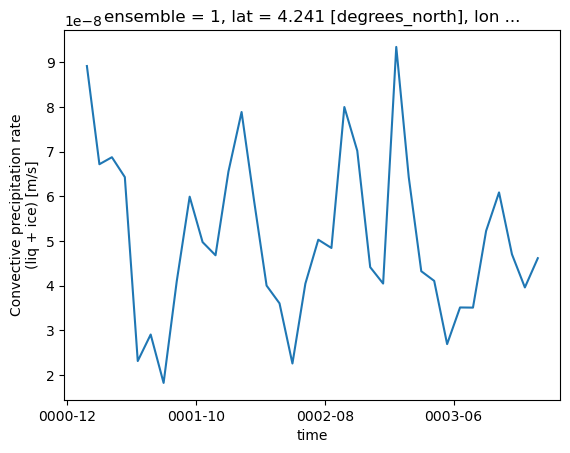

In [23]:
ds_indx.isel(ensemble = 1).plot()

In [30]:
ds_indx = ds_indx['PRECC']

In [31]:
np.quantile(ds_indx.isel(ensemble = 0), q = [0, 0.25, 0.5, 0.75, 1])

array([1.30682478e-08, 2.60622999e-08, 3.72464211e-08, 4.81960578e-08,
       7.76759848e-08])

In [37]:
ds_subset = ds_xr.isel(ensemble = 1)

In [ ]:
ds_subset = ds_xr.isel(ensemble = 0)

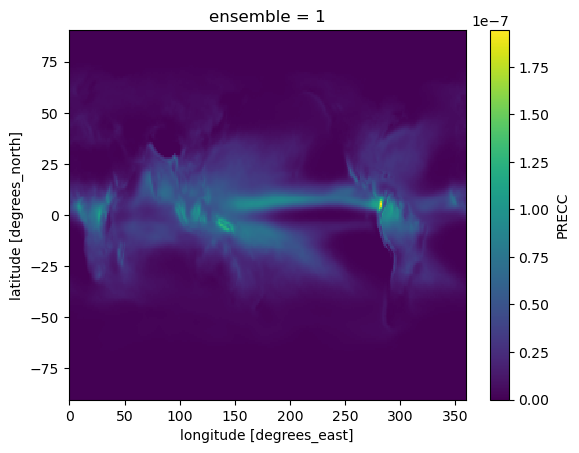

In [39]:
ds_subset.mean('time').plot();

In [40]:
ds_xr

<xarray.DataArray 'PRECC' (ensemble: 262, time: 36, lat: 192, lon: 288)> Size: 2GB
[521551872 values with dtype=float32]
Coordinates:
  * ensemble  (ensemble) int64 2kB 0 1 2 3 4 5 6 ... 256 257 258 259 260 261 262
  * lat       (lat) float64 2kB -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon       (lon) float64 2kB 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time      (time) object 288B 0001-01-16 12:00:00 ... 0003-12-16 12:00:00
Attributes:
    cell_methods:  time: mean
    long_name:     Convective precipitation rate (liq + ice)
    units:         m/s